In [204]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf

In [205]:
# Train data

#from google.colab import files
#uploaded = files.upload()

In [206]:
# import io
# train_data = pd.read_csv(io.BytesIO(uploaded['train_data.csv']))
#Test dataset from repo
# train_data = pd.read_csv('/Users/sudiptaghosh/Documents/StartUp/FinTech/datasets_from_repo/train_data.csv')

#TCS stock dataset
train_data = pd.read_csv('/Users/sudiptaghosh/Documents/StartUp/FinTech/Datasets/TCS.NS_train.csv')

In [207]:
#train_data.drop(columns=['Unnamed: 0'], inplace=True)

In [208]:
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/08/02,38.724998,40.000000,38.724998,39.700001,29.462610,212976.0
1,13/08/02,39.750000,40.387501,38.875000,39.162498,29.063698,153576.0
2,14/08/02,39.250000,39.250000,35.724998,36.462502,27.059959,822776.0
3,15/08/02,36.462502,36.462502,36.462502,36.462502,27.059959,0.0
4,16/08/02,36.275002,38.000000,35.750000,36.375000,26.995020,811856.0


In [209]:
train_data.fillna(method='ffill', inplace=True)
# train_data.dropna(inplace=True)

In [210]:
training_set = train_data.iloc[:,1:2].values
type(training_set)

numpy.ndarray

In [211]:
np.count_nonzero(~np.isnan(training_set))

3999

In [212]:
array_has_nan = np.isnan(training_set)
array_has_nan.size

3999

In [213]:
training_set.shape

(3999, 1)

In [214]:
# Normalizing data, scale between 0 and 1:

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))

training_data_scaled = sc.fit_transform(training_set)

In [215]:
length = len(training_data_scaled)
training_data_scaled.shape
print (length)

3999


In [216]:
X_train = []
y_train = []

for i in range(60, length):
  X_train.append(training_data_scaled[i-60:i, 0])
  y_train.append(training_data_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [217]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [218]:
# Building Model:

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True, 
                               input_shape=(X_train.shape[1], 1)))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_44 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_45 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_45 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_46 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_46 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_47 (LSTM)              (None, 50)              

In [219]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [222]:
modelo = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
124/124 [==============================] - 11s 93ms/step - loss: 0.0017
Epoch 2/10
124/124 [==============================] - 11s 92ms/step - loss: 0.0016
Epoch 3/10
124/124 [==============================] - 12s 93ms/step - loss: 0.0014
Epoch 4/10
124/124 [==============================] - 11s 93ms/step - loss: 0.0015
Epoch 5/10
124/124 [==============================] - 11s 93ms/step - loss: 0.0012
Epoch 6/10
124/124 [==============================] - 13s 103ms/step - loss: 0.0011
Epoch 7/10
124/124 [==============================] - 12s 95ms/step - loss: 0.0011
Epoch 8/10
124/124 [==============================] - 12s 95ms/step - loss: 0.0011
Epoch 9/10
124/124 [==============================] - 12s 93ms/step - loss: 0.0011
Epoch 10/10
124/124 [==============================] - 12s 95ms/step - loss: 0.0011


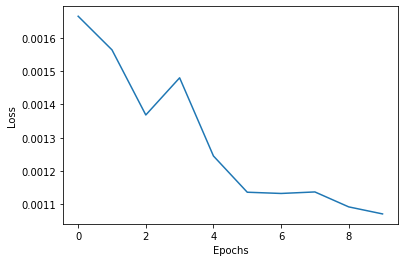

In [223]:
plt.plot(modelo.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# # Making Predictions:

# # Test Data

# from google.colab import files
# uploaded = files.upload()

In [234]:
# import io
# test_data = pd.read_csv(io.BytesIO(uploaded['test_data.csv']))
test_data = pd.read_csv('/Users/sudiptaghosh/Documents/StartUp/FinTech/Datasets/TCS.NS_test.csv')

In [235]:
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,23/08/18,2022.800049,2038.000000,2020.300049,2035.099976,1908.486450,3046791
1,24/08/18,2035.099976,2046.000000,2031.000000,2043.000000,1915.895020,1570533
2,27/08/18,2043.000000,2059.000000,2035.000000,2050.899902,1923.303589,1532702
3,28/08/18,2055.000000,2072.000000,2052.000000,2069.199951,1940.465210,1987983
4,29/08/18,2072.500000,2076.600098,2045.599976,2072.000000,1943.090820,1525867


In [236]:
real_stock_price = test_data.iloc[: , 1:2].values

In [237]:
real_stock_price

array([[2022.800049],
       [2035.099976],
       [2043.      ],
       [2055.      ],
       [2072.5     ],
       [2068.      ],
       [2082.300049],
       [2084.800049],
       [2059.800049],
       [2100.      ],
       [2075.      ],
       [2079.300049],
       [2084.399902],
       [2089.      ],
       [2052.350098],
       [2044.      ],
       [2070.      ],
       [2073.      ],
       [2071.899902],
       [2077.      ],
       [2115.      ],
       [2204.899902],
       [2187.      ],
       [2141.899902],
       [2178.      ],
       [2190.899902],
       [2250.300049],
       [2156.600098],
       [2050.      ],
       [2102.649902],
       [2080.350098],
       [2100.      ],
       [1985.      ],
       [1978.      ],
       [1940.      ],
       [1958.      ],
       [1970.      ],
       [1929.      ],
       [1914.      ],
       [1888.      ],
       [1852.050049],
       [1844.      ],
       [1853.900024],
       [1808.699951],
       [1867.      ],
       [19

In [249]:
test_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,23/08/18,2022.800049,2038.000000,2020.300049,2035.099976,1908.486450,3046791
1,24/08/18,2035.099976,2046.000000,2031.000000,2043.000000,1915.895020,1570533
2,27/08/18,2043.000000,2059.000000,2035.000000,2050.899902,1923.303589,1532702
3,28/08/18,2055.000000,2072.000000,2052.000000,2069.199951,1940.465210,1987983
4,29/08/18,2072.500000,2076.600098,2045.599976,2072.000000,1943.090820,1525867
...,...,...,...,...,...,...,...
810,08/12/21,3601.000000,3646.449951,3601.000000,3626.899902,3626.899902,1428660
811,09/12/21,3610.000000,3634.750000,3566.000000,3601.750000,3601.750000,1567957
812,10/12/21,3585.000000,3642.000000,3575.100098,3636.800049,3636.800049,1510718
813,13/12/21,3650.000000,3662.000000,3601.699951,3609.649902,3609.649902,1883864


In [250]:
# Handling with null values
test_data.fillna(method='ffill', inplace=True)

In [251]:
dataset_total = pd.concat([train_data['Open'], test_data['Open']], axis=0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(test_data)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [252]:
predicted_stock_price = model.predict(X_test)

In [253]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

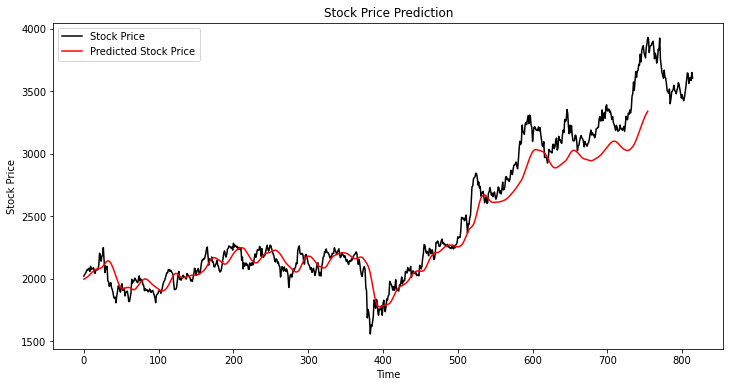

In [256]:
%matplotlib inline
plt.figure(figsize=(12, 6))

plt.plot(real_stock_price, color='black', label='Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')

plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()